In [0]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install fastai
!apt update && apt install -y libsm6 libxext6
!mkdir data && wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.79 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-datasets/9232/29380/blood-cells.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1529156697&Signature=H3ygGWcRgYfHz5jN00k41reSQLw7fw6VUxpkQ2r9iyAsI%2FSJh4H8elr%2FZzjnDiBiQQH0QBLBWL3Ev4uk5CbTRG%2F2RhHgfEz%2BAoTG80%2FPaZHsAFpG2yuR3sLE4%2B634rcryuKx6xID95NPAsO6ZRfi0K1amV9ZtCbVfS9ZkkQ%2F7AljOzqudBttTyU8D2xfzyEGdSta%2BvM7QgizC2pCLXCNceC2pKxAWNs0jFIl7MOgW90SImG8ABIGkrgGzwcY2CrMageGVJG7BEG77b746Alr8eiHSO84aM3T3N%2BLr9QhQ1h%2FnbM9H3KooW7wWiLMAQ3iyzQmr2UvJ2dyxyD9rZ44Mw%3D%3D" -O "blood-cells.zip" -c && unzip blood-cells.zip -d data/


In [0]:
!unzip data/dataset2-master.zip -d data/

In [0]:
from fastai.conv_learner import *
from fastai.plots import *

In [0]:
PATH = 'data/dataset2-master/images/'
!ls {PATH}
!ls {PATH}TRAIN

In [0]:
!ls {PATH}TRAIN/EOSINOPHIL | wc -l
!ls {PATH}TRAIN/LYMPHOCYTE | wc -l
!ls {PATH}TRAIN/MONOCYTE | wc -l
!ls {PATH}TRAIN/NEUTROPHIL | wc -l


In [0]:
list_paths = [f"{PATH}TRAIN/NEUTROPHIL/_102_3524.jpeg", f"{PATH}TRAIN/NEUTROPHIL/_131_7273.jpeg"]
titles=["Neutrophil 1", "Neutrophil 2"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In [0]:
n = 9957
val_idxs = get_cv_idxs(n)

In [0]:
metrics = ['accuracy']
model_arch = resnet34

In [0]:
!mv {PATH}TRAIN {PATH}train
!mv {PATH}TEST {PATH}test
!mv {PATH}TEST_SIMPLE {PATH}valid

In [0]:
def get_data(sz):
    tfms = tfms_from_model(model_arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_paths(PATH, tfms=tfms)

In [0]:
data = get_data(256)

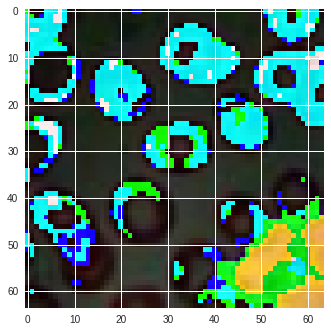

In [46]:
x,y = next(iter(data.val_dl))
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [0]:
sz=64

In [0]:
data = get_data(sz)

In [0]:
data = data.resize(int(sz*1.3), 'tmp')

In [0]:
learn = ConvLearner.pretrained(model_arch, data)

 87%|████████▋ | 135/156 [00:18<00:02,  7.40it/s, loss=7.14]

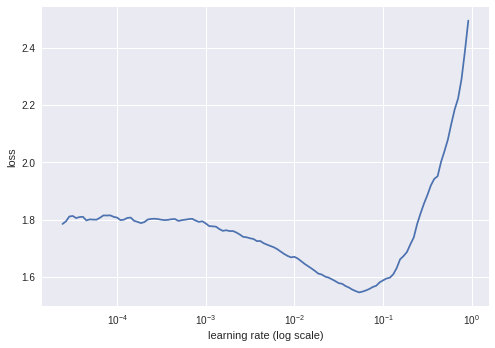

In [13]:
lrf = learn.lr_find()
learn.sched.plot()

In [0]:
lr = 1e-2

In [15]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.25594    1.113509   0.56338   
    1      1.17217    1.041563   0.535211  
 92%|█████████▏| 143/156 [00:17<00:01,  8.08it/s, loss=1.11]

    2      1.111513   1.052074   0.591549  
    3      1.124677   1.023366   0.521127  
    4      1.089646   1.05539    0.619718  
 67%|██████▋   | 105/156 [00:14<00:07,  7.16it/s, loss=1.06]

    5      1.053123   1.004336   0.591549  
    6      1.030807   0.994553   0.619718  


[array([0.99455]), 0.6197183123776611]

In [0]:
lrs = np.array([lr/9,lr/3,lr])

In [17]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.459074   0.632228   0.760563  
    1      0.242601   0.868986   0.774648  
 56%|█████▋    | 88/156 [00:20<00:16,  4.25it/s, loss=0.191]

    2      0.174215   0.683607   0.774648  
    3      0.151092   0.824025   0.802817  
    4      0.10643    0.64655    0.887324  
 20%|█▉        | 31/156 [00:09<00:38,  3.25it/s, loss=0.105]

    5      0.072299   0.781302   0.830986  
    6      0.062603   0.741094   0.816901  


[array([0.74109]), 0.8169014109692103]

In [0]:
learn.save(f'{sz}')

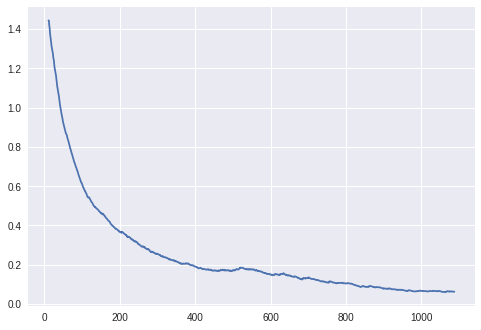

In [19]:
learn.sched.plot_loss()

In [0]:
sz=128

In [21]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.521724   0.439494   0.816901  
    1      0.451488   0.407567   0.887324  
 56%|█████▋    | 88/156 [00:21<00:16,  4.07it/s, loss=0.428]

    2      0.39663    0.437722   0.84507   
    3      0.403651   0.510314   0.802817  
    4      0.354249   0.469014   0.802817  
 20%|█▉        | 31/156 [00:08<00:35,  3.56it/s, loss=0.357]

    5      0.339742   0.425558   0.873239  
    6      0.344276   0.448104   0.84507   


[array([0.4481]), 0.8450704242142153]

In [22]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')


epoch      trn_loss   val_loss   accuracy   
    0      0.148826   0.50149    0.859155  
    1      0.081897   0.578514   0.859155  
 56%|█████▌    | 87/156 [00:52<00:41,  1.67it/s, loss=0.0583]

    2      0.054209   0.619244   0.859155  
    3      0.044991   0.67624    0.901408  
    4      0.027531   0.839216   0.887324  
 19%|█▊        | 29/156 [00:18<01:22,  1.53it/s, loss=0.0213]

    5      0.022807   0.864652   0.901408  
    6      0.01376    0.887664   0.901408  


In [0]:
sz=256


In [24]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.283245   0.399156   0.859155  
    1      0.232262   0.424561   0.84507   
 56%|█████▋    | 88/156 [01:05<00:50,  1.34it/s, loss=0.221]

    2      0.217257   0.382456   0.887324  
    3      0.20214    0.444754   0.84507   
    4      0.172595   0.35486    0.887324  
 20%|█▉        | 31/156 [00:24<01:40,  1.25it/s, loss=0.162]

    5      0.175394   0.351497   0.873239  
    6      0.176159   0.357452   0.873239  


[array([0.35745]), 0.8732394370394694]

In [25]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy   
    0      0.085886   0.384487   0.915493  
    1      0.046486   0.532403   0.901408  
 55%|█████▌    | 86/156 [02:41<02:11,  1.88s/it, loss=0.0263]

    2      0.020652   0.535763   0.929577  
    3      0.019672   0.588077   0.915493  
    4      0.012381   0.717901   0.901408  
 19%|█▊        | 29/156 [00:56<04:05,  1.93s/it, loss=0.0115]

    5      0.011987   0.698702   0.915493  
    6      0.0096     0.698117   0.901408  


In [42]:
preds, y = learn.TTA()
final_preds = np.mean(preds, 0)

(71, 4)
[[11  0  0  2]
 [ 0  6  0  0]
 [ 1  0  3  0]
 [ 4  0  0 44]]


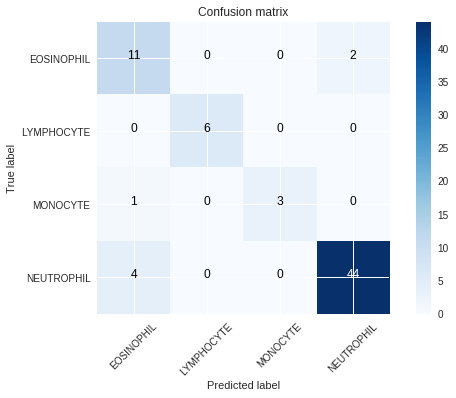

In [44]:
print(final_preds.shape)
final_final_preds = []
for row in final_preds:
  for i in range(4):
    if row[i] == max(row):
      if i == 0:
        final_final_preds.append(0)
      elif i == 1:
        final_final_preds.append(1)
      elif i == 2:
        final_final_preds.append(2)
      else:
        final_final_preds.append(3)
        
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, final_final_preds)
plot_confusion_matrix(cm, data.classes)